# Assignment 4

#### Tyler Young | 260730324

### Part 1: Data Acquisition

In [386]:
# imports
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import os

In [389]:
# read in and print out training set images
# images are accessed via a folder named "dataset" in the same folder as the notebook
directory = './dataset/'
SIZE = (128, 128)

harry, ron, herm, image_list = [], [], [], []
images = os.listdir(directory)

for i in range(len(images)):
    name = images[i]
    img = cv2.imread(directory + name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if 'd' in name:
        img = cv2.resize(img, SIZE)
        harry.append(img)
        image_list.append(img)
        
    elif 'r' in name:
        img = cv2.resize(img, SIZE)
        ron.append(img)
        image_list.append(img)
        
    elif 'e' in name:
        img = cv2.resize(img, SIZE)
        herm.append(img)
        image_list.append(img)
        
    else:
        print('error')

# show images
print('Harry Training Images:')
plt.figure(figsize=(10,10))
for i in range(len(harry)):
    plt.subplot(4, 3, i + 1)
    plt.imshow(harry[i], "gray")
    plt.axis('off')
    plt.tight_layout()
plt.show()

print('Ron Training Images:')
plt.figure(figsize=(10,10))
for i in range(len(ron)):
    plt.subplot(4, 3, i + 1)
    plt.imshow(ron[i], "gray")
    plt.axis('off')
    plt.tight_layout()
plt.show()

print('Hermione Training Images:')    
plt.figure(figsize=(10,10))
for i in range(len(herm)):
    plt.subplot(4, 3, i + 1)
    plt.imshow(herm[i], "gray")
    plt.axis('off')
    plt.tight_layout()
plt.show()

error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


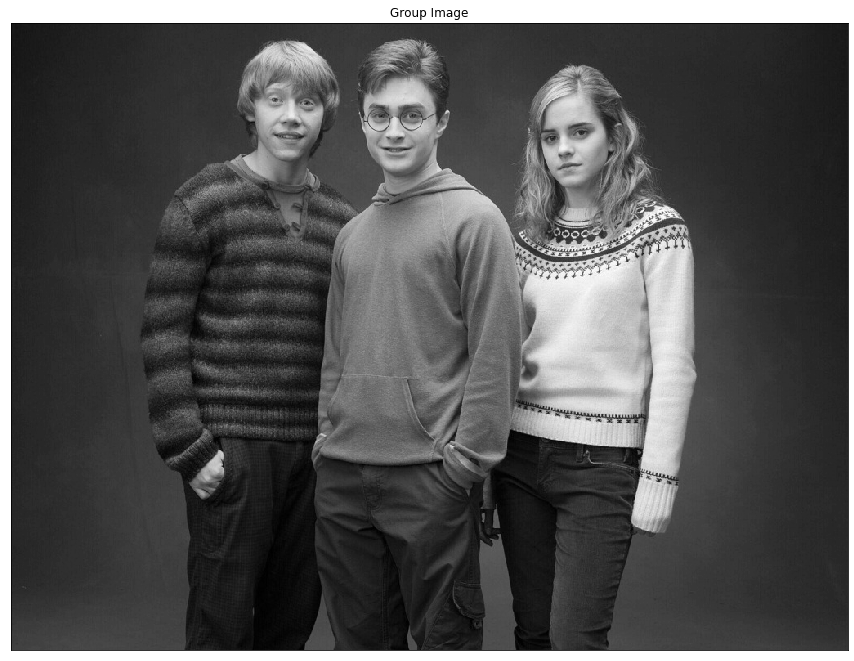

In [388]:
# read group image
# the group image is in the same folder as the notebook NOT in the dataset folder
imgGroup= cv2.imread('./Group Image.jpg')
imgGroup = cv2.cvtColor(imgGroup, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.imshow(imgGroup, "gray")
plt.title("Group Image"), plt.xticks([]), plt.yticks([])
plt.show()

#### Image Selection Explanation

I chose to select a group of three individuals who have many images together in order to find a group image which has all three under good lighting conditions, but also who have many images on their own as celebrities. As a result, I landed upon the main cast of the Harry Potter movie franchise; Daniel Radcliffe, Rupert Grint and Emma Watson. Additionally, I found that this group of three individuals had unique characteristics to their faces which would make it easier for a facial recognition process to identify them. Namely the fact that one of the members in the group is a female with dark eyebrows and darker pupils, and the two guys in the image have very different facial features such as glass or light/dark colored eyebrows. I felt as though these differences would be easy enough for a facial recognition program to detect and separate. To continue on my rationale, because they are playing iconic characters, there wouldn't be much of a change in their look between images so that audiences can easily recognize them. To that point, I made sure to choose images of them from the same era, this is because the actors grew up considerably while filming the movie so, I made sure to choose a group image from a later movie so that it would be easier to find better quality training set images. Additionally, with the training set images, I tried to find images with slightly varying viewpoints so that the program would have an easier time identifying them in the group image. Lastly, the group image I selected has a plain background so, it should be easier for the program to detect the individuals in the image over something in the background. I also chose to grayscale the images and reduce the size of the training set to increase computation speeds. 

## Part 2: Eigenface Representation

In [100]:
# Snapshot PCA Method from lecture slides
def PCA(D_mat):
    
    # Getting the dimensions of the matrix
    N, M = D_mat.shape
    
    # Case 1, then N << M
    if N < M:
        prod = np.dot(D_mat, D_mat.T)
        eigVal, eigVec = np.linalg.eig(prod)
        D = np.dot(D_mat.T, eigVec)
       
    # Case 2, otherwise
    else:
        prod = np.dot(D_mat.T, D_mat) / (N - 1)
        eigVal, eigVec = np.linalg.eig(prod)
        D = np.dot(D_mat, eigVec)
    
    # Sort the eigenvalues and eigenvectors
    eigVal.sort()
    eigVal = eigVal[::-1]

    eigVec.sort()
    eigVec = eigVec[::-1]
    
    return eigVal, eigVec, D

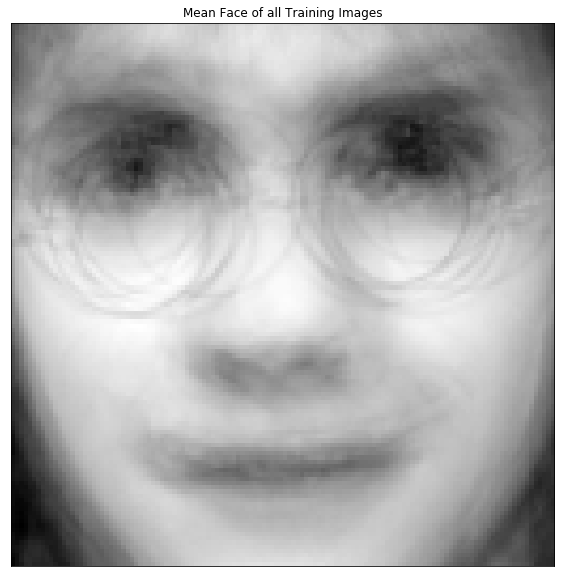

In [114]:
# in order to perform face recognition using eigenfaces, we need the 
# mean training image face to subtract as per lecture 17 slide 70
mean = []

temp = np.zeros((128, 128))
for img in image_list:
    temp += img

mean = temp / len(image_list)

plt.figure(figsize=(10,10))
plt.imshow(mean, cmap='gray')
plt.title("Mean Face of all Training Images")
plt.xticks([]), plt.yticks([])
plt.show()


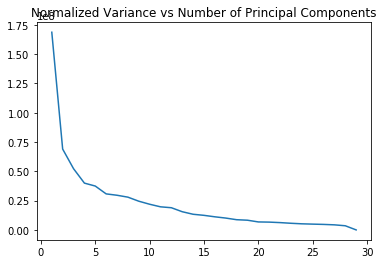

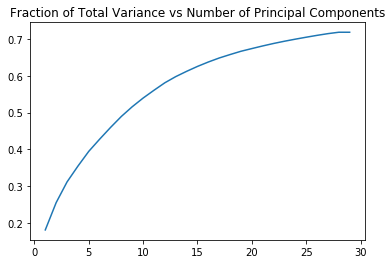

In [127]:
# normalizing the training image faces should increase the effectiveness
# of the facial detection process later
imgNorm = []

for img in image_list:
    newFace = img - mean
    imgNorm.append(newFace)

# create a list of normalized faces
normList = np.array(imgNorm)
normList = normList.reshape(normList.shape[0], -1)

# perform PCA on the normalized list of faces
eigVal, eigVec, faces = PCA(normList)

# plot the normalized variance versus the number of principal components
var = []
pComp = list(range(1,30))
vtot1 = 0

for i in pComp:
    v = eigVal[i]
    vtot1 += variance
    var.append(np.sum(v))

plt.plot(pComp, var)
plt.title('Normalized Variance vs Number of Principal Components')
plt.show()

# plot the fraction of total variance versus principal components
varFrac = []
vtot2 = np.sum(eigVal)
temp = 0
for i in pComp:
    temp += eigVal[i]
    varFrac.append(temp/vtot2)
    
plt.plot(pComp, varFrac)
plt.title('Fraction of Total Variance vs Number of Principal Components')
plt.show()

Eigenfaces


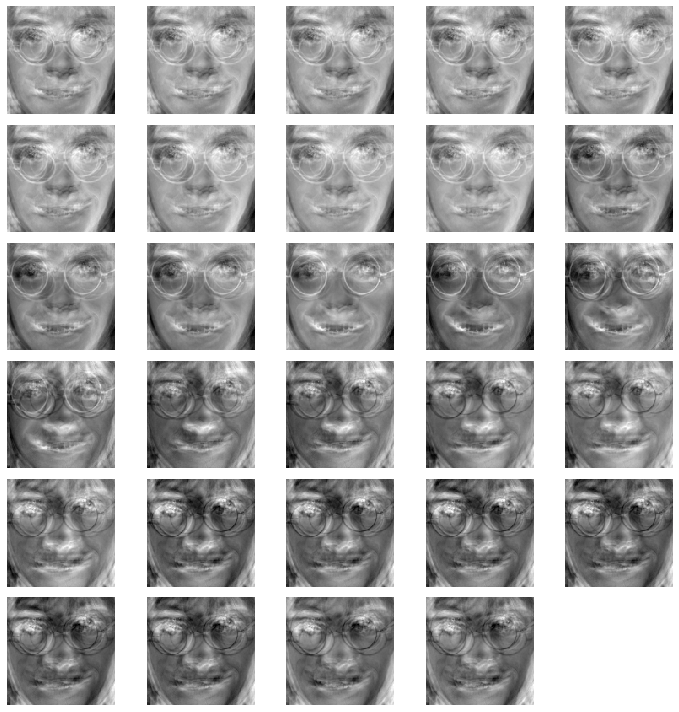

In [164]:
# evaluate and print out the eigenfaces
eFaces = []

# combine the PCA processed faces with the eigenvectors
faceImg = np.dot(faces, eigVec).transpose()

# resize them and add them to a list
for i in range(1, faceImg.shape[0]):
    img = faceImg[i].reshape(128, 128)
    eFaces.append(img)

# show eigenfaces
print('Eigenfaces')
plt.figure(figsize=(10, 10))
for i in range(len(eFaces)):
    plt.subplot(6, 5, i + 1)
    plt.imshow(eFaces[i], "gray")
    plt.axis('off')
    plt.tight_layout()
plt.show()

#### Vector Usage Explanation

You don't need to use all of the vectors to represent the data. This can be best explained by looking at the graphs of total variance versus principal components. After a certain point, the amount of total variance is greatly reduced. Therefore, when looking at the biger picture, the contribution of it's variance is insignificant and can be overlooked. Only a few of the principal components need to be used to represent the main features outlined with the training dataset. It would be redundant and inefficient to use all of the vectors as a few can represent the data sufficiently. 

## Part 3: Neighbourhood Clustering

### A. In Pixel Space

In [377]:
# find matches in pixel space
# keep track of neighbors 
neighbor = []

# find the L2 distance between neighbors in the training data
for img in normList:
    near = []
    for i in range(len(image_list)):
        lDist = np.linalg.norm(img - normList[i], ord=2)
        near.append(lDist)
        
        # move along the neighbors
        if(near[i] == 0):
            near[i] = 10000
            
    index = np.argmin(near)
    neighbor.append(index)
    
# keep track of positive matches
matches = []

# matches for Harry 
for i in neighbor[0:10]:
    if (i in range(0,10)):
        matches.append(i)
        
# matches for Ron       
for i in neighbor[10:20]:
    if (i in range(10,20)):
        matches.append(i)

# matches for Hermione
for i in neighbor[20:30]:
    if (i in range(20,30)):
        matches.append(i)
        
print("Total Matches:", len(matches))
print("Percent Matches", len(matches)/len(image_list)*100)

Total Matches: 19
Percent Matches 63.33333333333333


### B. In Eigen Space

In [378]:
# find matches in eigen space
eNeighbor = []

# find the L2 distance between neighbors in the training data
for img in eigVec:
    eNear = []
    for i in range(len(image_list)):
        lDist = np.linalg.norm(img - eigVec[i], ord=2)
        eNear.append(lDist)
        
        # move along the neighbors
        if(eNear[i] == 0):
            eNear[i] = 10000
            
    eIndex = np.argmin(eNear)
    eNeighbor.append(eIndex)

# keep track of positive matches
eMatches = []

# matches for Harry 
for i in eNeighbor[0:10]:
    if (i in range(0,10)):
        eMatches.append(i)
        
# matches for Ron       
for i in eNeighbor[10:20]:
    if (i in range(10,20)):
        eMatches.append(i)

# matches for Hermione
for i in eNeighbor[20:30]:
    if (i in range(20,30)):
        eMatches.append(i)
        
print("Total Matches:", len(eMatches))
print("Percent Matches", len(eMatches)/len(image_list)*100)

Total Matches: 16
Percent Matches 53.333333333333336


#### Analysis of Clustering

I would not expect there to be a significant difference between the clustering of the pixel space and the eigen space as they should be relatively successful in finding matches for the subjects. That being said, it is understandable that the percentage of matching in the pixel space is greater than the eigenspace because there is more comparable data that can be used. This is reflected in the results of the neighborhood clustering. 

## Part 4: Face Detection and Recognition

### A. Face Detection

In [383]:
# function to sweep over an image with a specified window
def slidingWindow(image, step, window):
    
    for y in range(0, image.shape[0], step):
        for x in range(0, image.shape[1], step):
            
            yield (x, y, image[y : y + window[1], x : x + window[0]])

In [384]:
# apply the sliding windows function to the group image and save the windows
windowList = slidingWindow(imgGroup, 100, [128,128])
windows = []

for i in windowList:
    
    w = cv2.resize(i[2], (128, 128),interpolation=cv2.INTER_AREA)
    windows.append(w)
    
dataset = np.array(windows).copy()

# establish experimentally determined thresholds
lowThresh = 6600
threshold = 7400

delta = []
detect = []

# detect faces based on thresholds
for img in dataset:
        norm = np.linalg.norm(img - mean, ord=2)
        delta.append(norm)

for j in delta:
        if (lowThresh< j < threshold):
            detect.append(j)
        else: 
            detect.append(0)
            
# save indicies of positively detected faces        
indices = []
    
for k in range(len(detect)):
    if detect[k] != 0:  
        indices.append(k) 

# save detected faces         
detectedFaces = []

for m in indices:
    detectedFaces.append(windows[m])

Group Image with Detected Faces:


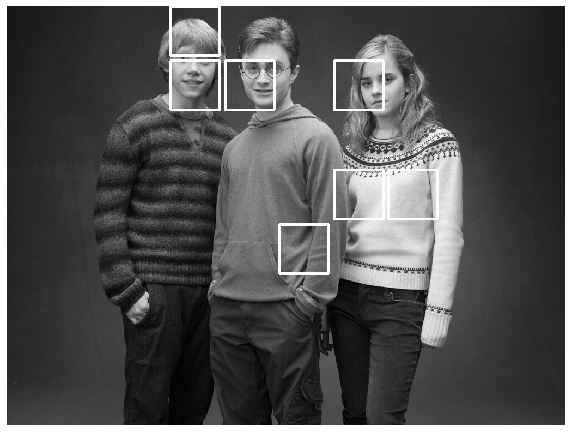

In [385]:
# draw windows on the group image
image = imgGroup.copy()
temp = image
stepSize = 100
(w, h) = (128, 128)
patch = []

for y in range(0, image.shape[0] , stepSize):
    for x in range(0, image.shape[1], stepSize):
        window = image[x : x + w, y : y + h]
        patch.append(window)
        for p in indices:
            if (len(patch) == p + 1): 
                cv2.rectangle(temp, (x, y), (x + w, y + h), (255, 0, 0), 4)

# show image
print("Group Image with Detected Faces:")        
plt.figure(figsize=(10,10))
plt.imshow(np.array(tmp).astype('uint8'), cmap = 'gray')
plt.axis('off')
plt.show()

### B. Recognition

In [375]:
# normalize the detected faces
# same overall process as how the training set images were normalized
ndf = []

for img in detectedFaces:
    nf = img - mean
    ndf.append(nf)

fndf = np.array(ndf)
fndf = fndf.reshape(fndf.shape[0], -1)
 
pca2 = np.dot(fndf, faces)
data = pca2.copy()

# evaluate nearest neighbors in vector space
vecNeighbor = []

for img in data:
        vecNear = []
        for i in range(30):
            norm = np.linalg.norm(img - eigVec[i], ord=2)
            vecNear.append(norm)

        index = np.argmin(vecNear)
        vecNeighbor.append(index)
        
# check for matches       
matchList = []

# checking for Harry
if(vecNeighbor[0] in range(0, 10)): 
    matchList.append(matches)
    print("Harry Recognized")

# checking for Ron
if(vecNeighbor[1] in range(10, 20)):
    matchList.append(matches)
    print("Ron Recognized")
    
# checking for Hermione
if(vecNeighbor[2] in range(20, 30)):
    matchList.append(matches)
    print("Hermione Recognized") 

Hermione Recognized


#### Analysis of Face Detection and Recognition

I found that the accuracy of this method works relatively poorly well for the images I chose. From the facial detection, I found that there were 4 false positives. The number of neighbours you need to get correct before evaluating it to have the correct neighbour was determined to be 1. Unfortunately, my method was unable to identify everyone in the image and there were no false positives. PCA tends to have difficulty when the training images used are too similar to each other. Additionally, when the training dataset is very small, there will be even fewer variances between images and this will hinder PCA's functioning. Small datasets would also cause issues because PCA may be unable to detect faces without enough training reference. 

I would expect these methods to fail if the the training images hadn't been resized and grayscaled. The consistent sizing is important because otherwise the eigenfaces could not be created. Additionally, because it had been grayscaled for computational efficiency, consistent lighting becomes much more important. Colors cannot be differenciated and so, something in poor lighting may be interpreted as completely different as something in good lighting. To improve this process, larger datasets with training images properly aligned would greatly increase the method's accuracy. I would also expect that normalizing the training images might reduce outliers and the probability of errors which is why it was implemented. Lastly, the windows that comprise the faces needs to span the image better to have it overlap a face more completely, this would increase the likelihood of a correct recognition. 

### Image References

Group Image

https://www.fanpop.com/clubs/harry-potter/images/17981371/title/harry-ron-hermione-photo/11 

Harry Training Images

https://vignette.wikia.nocookie.net/harrypotterwarnerbros/images/5/52/TrioRonHarryHermione.png/revision/latest?cb=20170415024104

https://i.pinimg.com/originals/2c/9e/3c/2c9e3c2a69b808a8979fb75d19db43f6.jpg

https://0.soompi.io/wp-content/uploads/l/f/aa/480081/480081.png?s=900x600&e=t 

https://i.insider.com/5661d5e7dd089503638b464b?width=1100&format=jpeg&auto=webp

https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/daniel-radcliffe-harry-potter-1577468480.jpg?crop=0.871xw:0.776xh;0.0425xw,0&resize=1200:*

https://i.pinimg.com/originals/1f/9c/22/1f9c2295572c1d64b728f86e3bb28ae7.jpg

https://i.pinimg.com/originals/eb/b0/2f/ebb02f77d7a34e2f2fd0652550adfbdd.jpg

https://img1.looper.com/img/gallery/what-daniel-radcliffe-has-been-doing-since-harry-potter-ended/intro-1569869083.jpg

https://i.pinimg.com/originals/cc/a1/68/cca16870dce04068a902f0f1c5850cdd.jpg

https://i.pinimg.com/474x/4c/2b/e1/4c2be140bcd2ed550bbe62c0ff0803bd.jpg

Ron Training Images

https://bobrtimes.com/wp-content/uploads/2019/11/2162f962b5dfd5591f7f561463031a62.jpg

https://www.biography.com/.image/t_share/MTIwNjA4NjMzNDMzMzI3MTE2/rupert-grint-6428-1-402.jpg

https://celebvogue.com/wp-content/uploads/2019/11/Rupert-Grint-1.jpg

https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQnz-Bn3uwO3dlpPRSxTYK7pk2e6mMK98xrc2Q0thfTtgmoUJbE&usqp=CAU

https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSvN08NRp5Im3o8JaZ0ub14m8k9a2WgMR7ta7uAMMG7rTZxs_I2&usqp=CAU

https://static.toiimg.com/thumb/msid-57702844,width-800,height-600,resizemode-75,imgsize-83065,pt-32,y_pad-40/57702844.jpg

https://short-biography.com/wp-content/uploads/rupert-grint/Rupert-Grint.jpg

https://static.independent.co.uk/s3fs-public/thumbnails/image/2016/08/11/09/ron-weasley.jpg?w968h681

https://www.the-leaky-cauldron.org/wp-content/uploads/assets/tumblr_ntki2stZrX1sgjum7o2_1280.jpg

https://assets.afcdn.com/story/20140919/496435_w980h638c1cx532cy248.jpg

Hermione Training Images

https://i.pinimg.com/originals/7d/e4/23/7de423330fcfb9c381cd299ac79edaa9.jpg

https://vignette.wikia.nocookie.net/harrypotter/images/5/51/0140ootp_hermione.jpg/revision/latest/scale-to-width-down/340?cb=20190117041925

https://pm1.narvii.com/6729/e3fd9f1457796851238a7cab25509c23b3373702v2_hq.jpg

https://i.pinimg.com/originals/9f/9b/12/9f9b127b9d97b272941a0dbc02808bb4.jpg

https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQYLaxuufHFKpB04r_tlkYOOu4a2_cickSbHr003xodS_IAKu2g&usqp=CAU

https://i.pinimg.com/originals/70/2f/e9/702fe93b3900d3522b96c640c424b795.jpg

https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSuyzb5VvIgcpmzNgyhbiQpx5oaRPJEaGKb61MYIAjz4k8jSd3m&usqp=CAU

https://i.pinimg.com/originals/c5/f1/2c/c5f12c20aa8529e2e69706fbe7659669.jpg

https://i.pinimg.com/originals/0f/80/53/0f805341713c688c235c6264a1e6b64a.jpg

https://i.pinimg.com/originals/38/60/18/3860184365064843b89f1e8c24866241.jpg